In [2]:
import numpy as np 
import pandas as pd
import os
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("covid_19_data.csv", parse_dates=["ObservationDate"])
df = df.groupby(["ObservationDate", "Country/Region"], as_index=False).sum()
df.set_index("ObservationDate",inplace=True)

In [4]:
df.index = pd.DatetimeIndex(df.index).to_period('D')

In [5]:
df

,Country/Region,SNo,Confirmed,Deaths,Recovered
ObservationDate,,,,,
2020-01-22,Hong Kong,13,0,0,0
2020-01-22,Japan,36,2,0,0
2020-01-22,Macau,21,1,0,0
2020-01-22,Mainland China,535,547,17,28
2020-01-22,South Korea,38,1,0,0
...,...,...,...,...,...
2020-05-01,West Bank and Gaza,20430,353,2,76
2020-05-01,Western Sahara,20431,6,0,5
2020-05-01,Yemen,20432,7,2,1


In [6]:
df.index

PeriodIndex(['2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
             '2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
             '2020-01-23', '2020-01-23',
             ...
             '2020-05-01', '2020-05-01', '2020-05-01', '2020-05-01',
             '2020-05-01', '2020-05-01', '2020-05-01', '2020-05-01',
             '2020-05-01', '2020-05-01'],
            dtype='period[D]', name='ObservationDate', length=11292, freq='D')

In [7]:
df['CountryOrRegion'] = df['Country/Region']

In [8]:
df.drop('SNo',inplace=True,axis=1)

**Data visualization for the United States. (Showing 'Confirmed', 'Deaths', and 'Recovered' from 1/22/20 to 5/1/20)**

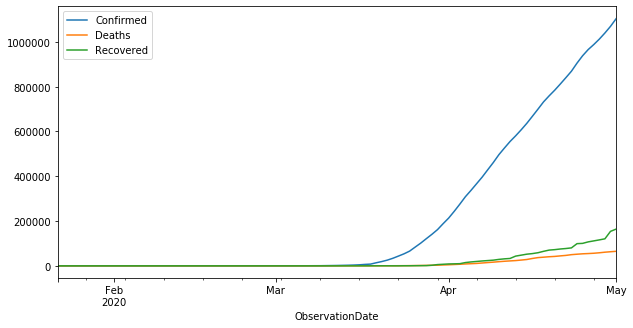

In [9]:
US_df = df[df["CountryOrRegion"] == "US"]

US_df = US_df[US_df["Confirmed"] > 0]
US_df = US_df[["Confirmed", "Deaths", "Recovered"]]
US_df.plot(figsize=(10,5))

**Data visualization for the Mainland China. (Showing 'Confirmed', 'Deaths', and 'Recovered' from 1/22/20 to 5/1/20)**

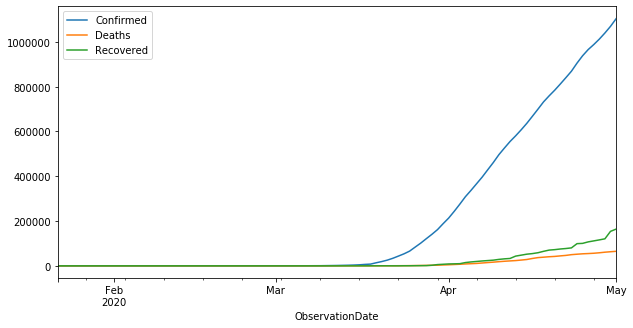

In [10]:
China_df = df[df["CountryOrRegion"] == "Mainland China"]

China_df = US_df[US_df["Confirmed"] > 0]
China_df = US_df[["Confirmed", "Deaths", "Recovered"]]
China_df.plot(figsize=(10,5))

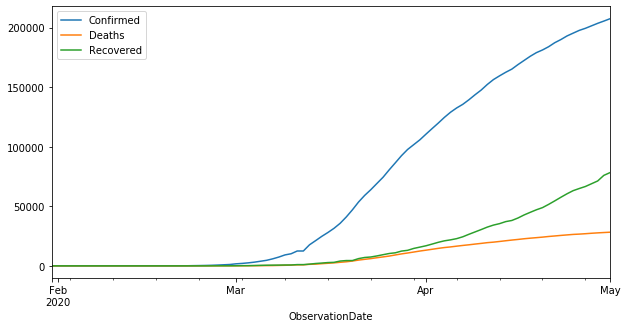

In [11]:
Italy_df = df[df["CountryOrRegion"] == "Italy"]

Italy_df = Italy_df[Italy_df["Confirmed"] > 0]
Italy_df = Italy_df[["Confirmed", "Deaths", "Recovered"]]
Italy_df.plot(figsize=(10,5))

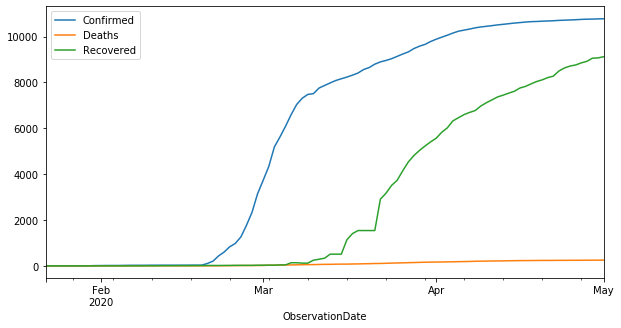

In [12]:
SK_df = df[df["CountryOrRegion"] == "South Korea"]

SK_df = SK_df[SK_df["Confirmed"] > 0]
SK_df = SK_df[["Confirmed", "Deaths", "Recovered"]]
SK_df.plot(figsize=(10,5))

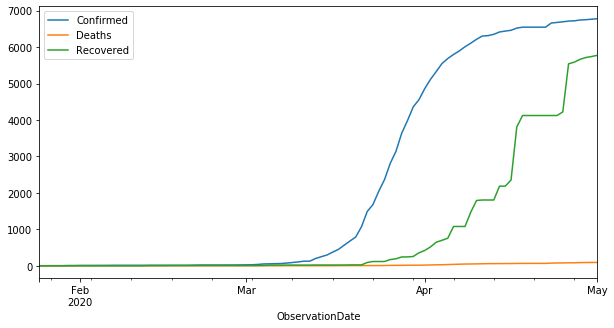

In [13]:
Aus_df = df[df["CountryOrRegion"] == "Australia"]

Aus_df = Aus_df[Aus_df["Confirmed"] > 0]
Aus_df = Aus_df[["Confirmed", "Deaths", "Recovered"]]
Aus_df.plot(figsize=(10,5))

**Modelling the data of confirmed cases for the United States from 3/1/20 to 4/20/20**

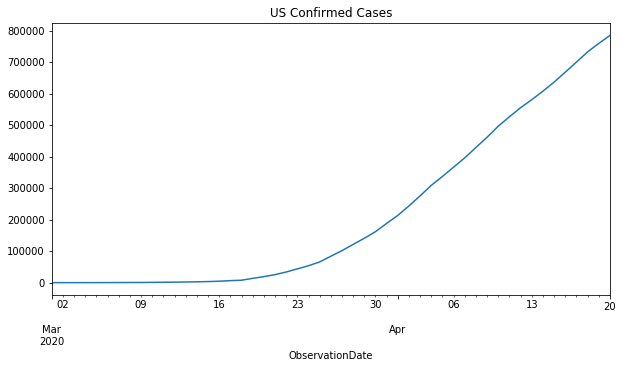

In [14]:
US_confirmed = df[df["CountryOrRegion"] == "US"]
US_confirmed = US_confirmed.loc["2020-03-01":"2020-04-20"]

US_confirmed["Confirmed"].plot(figsize=(10,5), title="US Confirmed Cases")


**Number of confirmed cases, predicted in 10 days using Holt exponential smoothing.**

2020-04-21    8.104053e+05
2020-04-22    8.373515e+05
2020-04-23    8.651936e+05
2020-04-24    8.939615e+05
2020-04-25    9.236859e+05
2020-04-26    9.543987e+05
2020-04-27    9.861327e+05
2020-04-28    1.018922e+06
2020-04-29    1.052801e+06
2020-04-30    1.087807e+06
Freq: D, dtype: float64


C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


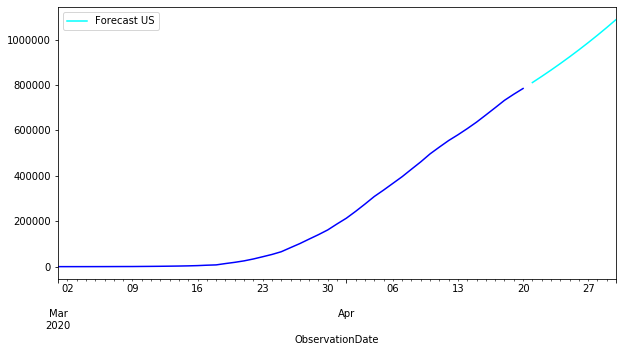

In [15]:
from statsmodels.tsa.api import Holt

ets_US = Holt(US_confirmed["Confirmed"], exponential=True).fit()
forecast_US = ets_US.forecast(10) #days to forecast
print(forecast_US)

US_confirmed["Confirmed"].plot(figsize=(10,5), color="blue")
forecast_US.plot(kind="line", color="cyan", legend=True, label="Forecast US")

**Actual confirmed cases with 10 days included for comparison.**

                Country/Region  Confirmed  Deaths  Recovered CountryOrRegion
ObservationDate                                                             
2020-03-01                  US         76       1          7              US
2020-03-02                  US        101       6          7              US
2020-03-03                  US        122       7          8              US
2020-03-04                  US        153      11          8              US
2020-03-05                  US        221      12          8              US
...                        ...        ...     ...        ...             ...
2020-04-26                  US     965783   54881     106988              US
2020-04-27                  US     988197   56259     111424              US
2020-04-28                  US    1012582   58355     115936              US
2020-04-29                  US    1039909   60967     120720              US
2020-04-30                  US    1069424   62996     153947              US

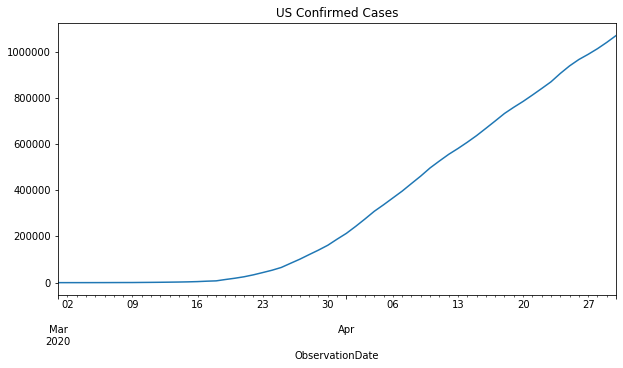

In [16]:
US_confirmed = df[df["CountryOrRegion"] == "US"]
US_confirmed = US_confirmed.loc["2020-03-01":"2020-04-30"]

US_confirmed["Confirmed"].plot(figsize=(10,5), title="US Confirmed Cases")
print(US_confirmed)

**Modelling the data of confirmed cases for Mainland China from 3/1/20 to 4/23/20**

                 Country/Region  Confirmed  Deaths  Recovered CountryOrRegion
ObservationDate                                                              
2020-03-01       Mainland China      79826    2870      42118  Mainland China
2020-03-02       Mainland China      80026    2912      44810  Mainland China
2020-03-03       Mainland China      80151    2945      47404  Mainland China
2020-03-04       Mainland China      80271    2981      49955  Mainland China
2020-03-05       Mainland China      80422    3013      52240  Mainland China
2020-03-06       Mainland China      80573    3042      53888  Mainland China
2020-03-07       Mainland China      80652    3070      55478  Mainland China
2020-03-08       Mainland China      80699    3097      57320  Mainland China
2020-03-09       Mainland China      80735    3120      58735  Mainland China
2020-03-10       Mainland China      80757    3136      60106  Mainland China
2020-03-11       Mainland China      80785    3158      61569  M

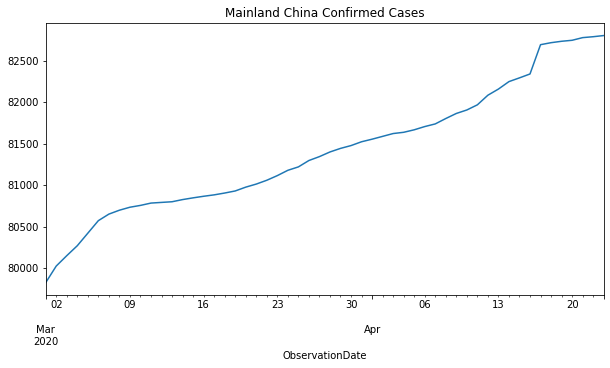

In [17]:
Mainland_China_confirmed = df[df["CountryOrRegion"] == "Mainland China"]
Mainland_China_confirmed = Mainland_China_confirmed.loc["2020-03-01":"2020-04-23"]

Mainland_China_confirmed["Confirmed"].plot(figsize=(10,5), title="Mainland China Confirmed Cases")
print(Mainland_China_confirmed)

**Number of confirmed cases, predicted in a week using Holt exponential smoothing.**

2020-04-24    82829.550456
2020-04-25    82853.730227
2020-04-26    82877.917056
2020-04-27    82902.110946
2020-04-28    82926.311899
2020-04-29    82950.519916
2020-04-30    82974.735001
Freq: D, dtype: float64


C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


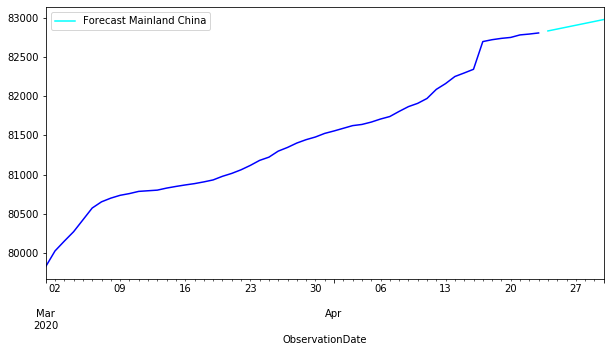

In [18]:
ets_Mainland_China = Holt(Mainland_China_confirmed["Confirmed"], exponential=True).fit()
forecast_Mainland_China = ets_Mainland_China.forecast(7) #days to forecast
print(forecast_Mainland_China)

Mainland_China_confirmed["Confirmed"].plot(figsize=(10,5), color="blue")
forecast_Mainland_China.plot(kind="line", color="cyan", legend=True, label="Forecast Mainland China")

**Actual confirmed cases with week included for comparison.**

                 Country/Region  Confirmed  Deaths  Recovered CountryOrRegion
ObservationDate                                                              
2020-03-01       Mainland China      79826    2870      42118  Mainland China
2020-03-02       Mainland China      80026    2912      44810  Mainland China
2020-03-03       Mainland China      80151    2945      47404  Mainland China
2020-03-04       Mainland China      80271    2981      49955  Mainland China
2020-03-05       Mainland China      80422    3013      52240  Mainland China
...                         ...        ...     ...        ...             ...
2020-04-26       Mainland China      82830    4633      77474  Mainland China
2020-04-27       Mainland China      82836    4633      77555  Mainland China
2020-04-28       Mainland China      82858    4633      77578  Mainland China
2020-04-29       Mainland China      82862    4633      77610  Mainland China
2020-04-30       Mainland China      82874    4633      77642  M

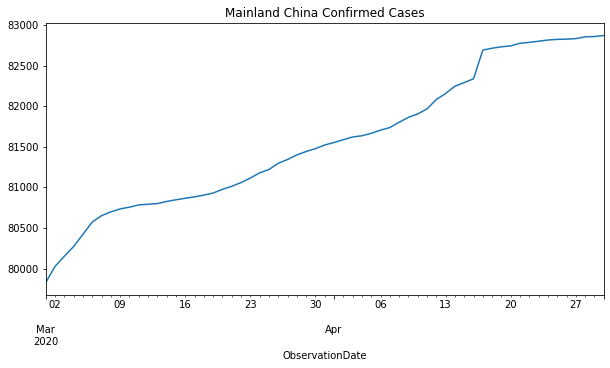

In [19]:
Mainland_China_confirmed = df[df["CountryOrRegion"] == "Mainland China"]
Mainland_China_confirmed = Mainland_China_confirmed.loc["2020-03-01":"2020-04-30"]

Mainland_China_confirmed["Confirmed"].plot(figsize=(10,5), title="Mainland China Confirmed Cases")
print(Mainland_China_confirmed)

                Country/Region  Confirmed  Deaths  Recovered CountryOrRegion
ObservationDate                                                             
2020-03-01               Italy       1694      34         83           Italy
2020-03-02               Italy       2036      52        149           Italy
2020-03-03               Italy       2502      79        160           Italy
2020-03-04               Italy       3089     107        276           Italy
2020-03-05               Italy       3858     148        414           Italy
2020-03-06               Italy       4636     197        523           Italy
2020-03-07               Italy       5883     233        589           Italy
2020-03-08               Italy       7375     366        622           Italy
2020-03-09               Italy       9172     463        724           Italy
2020-03-10               Italy      10149     631        724           Italy
2020-03-11               Italy      12462     827       1045           Italy

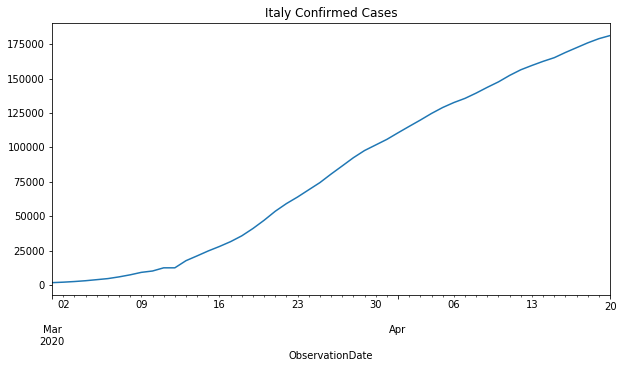

In [20]:
Italy_confirmed = df[df["CountryOrRegion"] == "Italy"]
Italy_confirmed = Italy_confirmed.loc["2020-03-01":"2020-04-20"]

Italy_confirmed["Confirmed"].plot(figsize=(10,5), title="Italy Confirmed Cases")
print(Italy_confirmed)

2020-04-21    183759.352999
2020-04-22    186217.873935
2020-04-23    188709.287483
2020-04-24    191234.033714
2020-04-25    193792.558588
2020-04-26    196385.314029
2020-04-27    199012.758010
2020-04-28    201675.354629
2020-04-29    204373.574194
2020-04-30    207107.893305
Freq: D, dtype: float64


C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


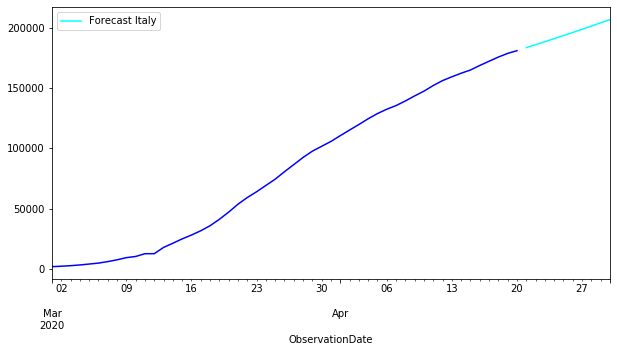

In [21]:
ets_Italy = Holt(Italy_confirmed["Confirmed"], exponential=True).fit()
forecast_Italy = ets_Italy.forecast(10) #days to forecast
print(forecast_Italy)

Italy_confirmed["Confirmed"].plot(figsize=(10,5), color="blue")
forecast_Italy.plot(kind="line", color="cyan", legend=True, label="Forecast Italy")

                Country/Region  Confirmed  Deaths  Recovered CountryOrRegion
ObservationDate                                                             
2020-03-01               Italy       1694      34         83           Italy
2020-03-02               Italy       2036      52        149           Italy
2020-03-03               Italy       2502      79        160           Italy
2020-03-04               Italy       3089     107        276           Italy
2020-03-05               Italy       3858     148        414           Italy
...                        ...        ...     ...        ...             ...
2020-04-26               Italy     197675   26644      64928           Italy
2020-04-27               Italy     199414   26977      66624           Italy
2020-04-28               Italy     201505   27359      68941           Italy
2020-04-29               Italy     203591   27682      71252           Italy
2020-04-30               Italy     205463   27967      75945           Italy

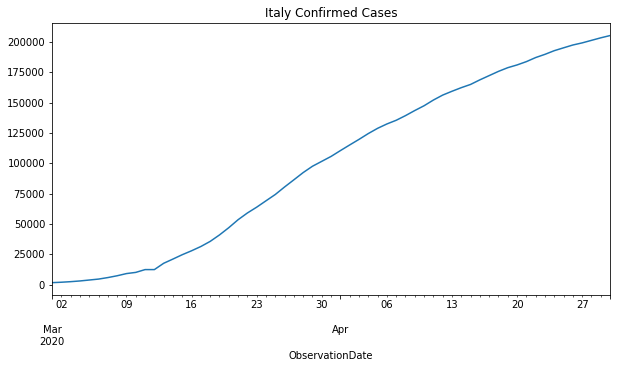

In [22]:
Italy_confirmed = df[df["CountryOrRegion"] == "Italy"]
Italy_confirmed = Italy_confirmed.loc["2020-03-01":"2020-04-30"]

Italy_confirmed["Confirmed"].plot(figsize=(10,5), title="Italy Confirmed Cases")
print(Italy_confirmed)

                Country/Region  Confirmed  Deaths  Recovered CountryOrRegion
ObservationDate                                                             
2020-03-01         South Korea       3736      17         30     South Korea
2020-03-02         South Korea       4335      28         30     South Korea
2020-03-03         South Korea       5186      28         30     South Korea
2020-03-04         South Korea       5621      35         41     South Korea
2020-03-05         South Korea       6088      35         41     South Korea
2020-03-06         South Korea       6593      42        135     South Korea
2020-03-07         South Korea       7041      44        135     South Korea
2020-03-08         South Korea       7314      50        118     South Korea
2020-03-09         South Korea       7478      53        118     South Korea
2020-03-10         South Korea       7513      54        247     South Korea
2020-03-11         South Korea       7755      60        288     South Korea

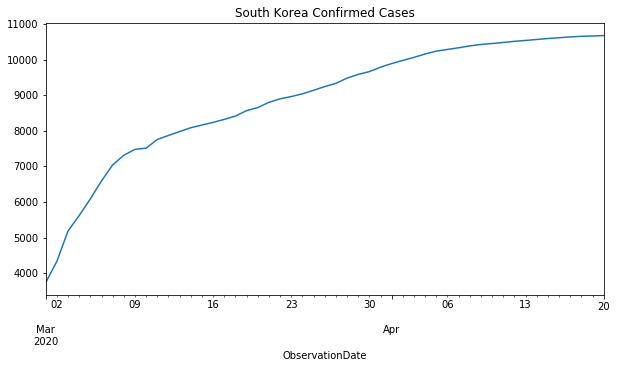

In [23]:
SK_confirmed = df[df["CountryOrRegion"] == "South Korea"]
SK_confirmed = SK_confirmed.loc["2020-03-01":"2020-04-20"]

SK_confirmed["Confirmed"].plot(figsize=(10,5), title="South Korea Confirmed Cases")
print(SK_confirmed)

2020-04-21    10685.555943
2020-04-22    10697.343995
2020-04-23    10709.145051
2020-04-24    10720.959126
2020-04-25    10732.786233
2020-04-26    10744.626388
2020-04-27    10756.479605
2020-04-28    10768.345898
2020-04-29    10780.225282
2020-04-30    10792.117771
Freq: D, dtype: float64


C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


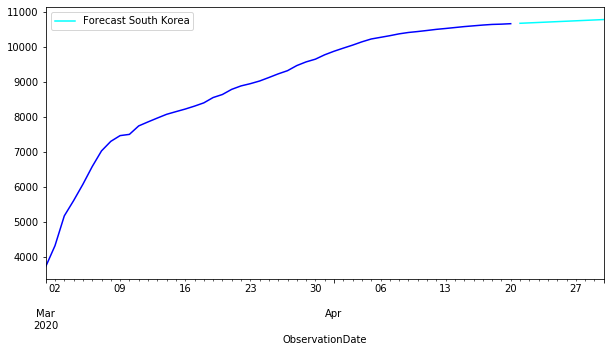

In [24]:
ets_SK = Holt(SK_confirmed["Confirmed"], exponential=True).fit()
forecast_SK = ets_SK.forecast(10) #days to forecast
print(forecast_SK)

SK_confirmed["Confirmed"].plot(figsize=(10,5), color="blue")
forecast_SK.plot(kind="line", color="cyan", legend=True, label="Forecast South Korea")

                Country/Region  Confirmed  Deaths  Recovered CountryOrRegion
ObservationDate                                                             
2020-03-01         South Korea       3736      17         30     South Korea
2020-03-02         South Korea       4335      28         30     South Korea
2020-03-03         South Korea       5186      28         30     South Korea
2020-03-04         South Korea       5621      35         41     South Korea
2020-03-05         South Korea       6088      35         41     South Korea
...                        ...        ...     ...        ...             ...
2020-04-26         South Korea      10738     243       8764     South Korea
2020-04-27         South Korea      10752     244       8854     South Korea
2020-04-28         South Korea      10761     246       8922     South Korea
2020-04-29         South Korea      10765     247       9059     South Korea
2020-04-30         South Korea      10774     248       9072     South Korea

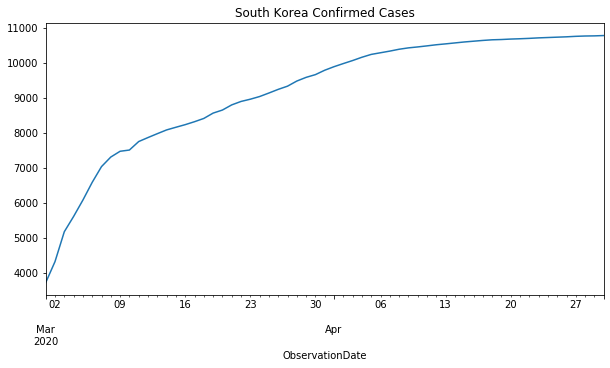

In [25]:
SK_confirmed = df[df["CountryOrRegion"] == "South Korea"]
SK_confirmed = SK_confirmed.loc["2020-03-01":"2020-04-30"]

SK_confirmed["Confirmed"].plot(figsize=(10,5), title="South Korea Confirmed Cases")
print(SK_confirmed)

                Country/Region  Confirmed  Deaths  Recovered CountryOrRegion
ObservationDate                                                             
2020-03-01           Australia         27       1         11       Australia
2020-03-02           Australia         30       1         11       Australia
2020-03-03           Australia         39       1         11       Australia
2020-03-04           Australia         52       2         11       Australia
2020-03-05           Australia         55       2         21       Australia
2020-03-06           Australia         60       2         21       Australia
2020-03-07           Australia         63       2         21       Australia
2020-03-08           Australia         76       4         21       Australia
2020-03-09           Australia         91       4         21       Australia
2020-03-10           Australia        107       3         21       Australia
2020-03-11           Australia        128       3         21       Australia

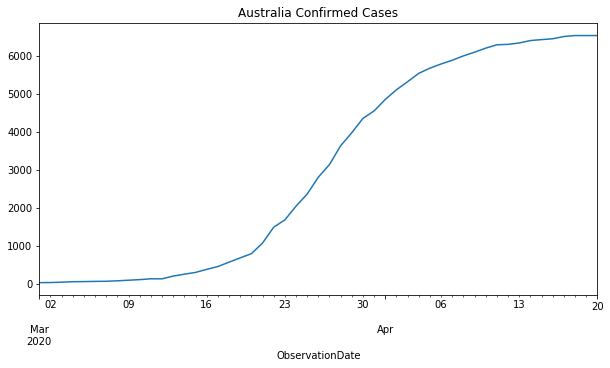

In [26]:
Aus_confirmed = df[df["CountryOrRegion"] == "Australia"]
Aus_confirmed = Aus_confirmed.loc["2020-03-01":"2020-04-20"]

Aus_confirmed["Confirmed"].plot(figsize=(10,5), title="Australia Confirmed Cases")
print(Aus_confirmed)

2020-04-21    6547.417885
2020-04-22    6545.561240
2020-04-23    6543.705122
2020-04-24    6541.849530
2020-04-25    6539.994464
2020-04-26    6538.139925
2020-04-27    6536.285911
2020-04-28    6534.432423
2020-04-29    6532.579461
2020-04-30    6530.727024
Freq: D, dtype: float64


C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


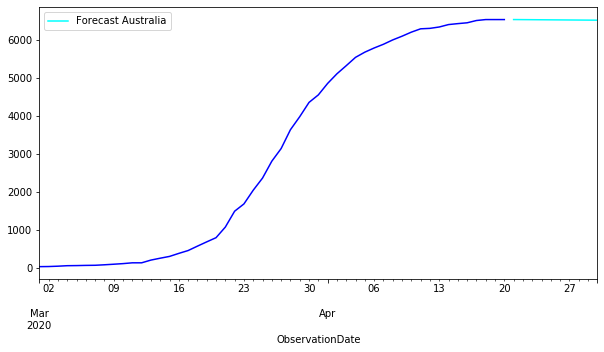

In [27]:
ets_Aus = Holt(Aus_confirmed["Confirmed"], exponential=True).fit()
forecast_Aus = ets_Aus.forecast(10) #days to forecast
print(forecast_Aus)

Aus_confirmed["Confirmed"].plot(figsize=(10,5), color="blue")
forecast_Aus.plot(kind="line", color="cyan", legend=True, label="Forecast Australia")

                Country/Region  Confirmed  Deaths  Recovered CountryOrRegion
ObservationDate                                                             
2020-03-01           Australia         27       1         11       Australia
2020-03-02           Australia         30       1         11       Australia
2020-03-03           Australia         39       1         11       Australia
2020-03-04           Australia         52       2         11       Australia
2020-03-05           Australia         55       2         21       Australia
...                        ...        ...     ...        ...             ...
2020-04-26           Australia       6714      83       5541       Australia
2020-04-27           Australia       6721      83       5588       Australia
2020-04-28           Australia       6744      89       5665       Australia
2020-04-29           Australia       6752      91       5715       Australia
2020-04-30           Australia       6766      93       5742       Australia

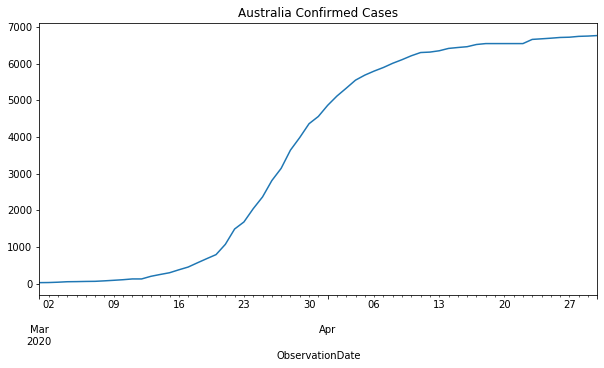

In [28]:
Aus_confirmed = df[df["CountryOrRegion"] == "Australia"]
Aus_confirmed = Aus_confirmed.loc["2020-03-01":"2020-04-30"]

Aus_confirmed["Confirmed"].plot(figsize=(10,5), title="Australia Confirmed Cases")
print(Aus_confirmed)

**New dataframe filtered by US States.**

In [29]:
df2 = pd.read_csv("covid_19_data.csv", parse_dates=["ObservationDate"])
df2 = df2[df2['Country/Region'] == "US"] 
df2 = df2.groupby(["ObservationDate", "Province/State"], as_index=False).sum()

df2.set_index("ObservationDate",inplace=True)

In [30]:
df2

,Province/State,SNo,Confirmed,Deaths,Recovered
ObservationDate,,,,,
2020-01-22,Washington,32,1,0,0
2020-01-23,Washington,70,1,0,0
2020-01-24,Chicago,119,1,0,0
2020-01-24,Washington,118,1,0,0
2020-01-25,Illinois,160,1,0,0
...,...,...,...,...,...
2020-05-01,Virginia,20565,16902,581,0
2020-05-01,Washington,20566,14637,824,0
2020-05-01,West Virginia,20567,1152,46,0


In [31]:
df2.drop('SNo',inplace=True,axis=1)

In [32]:
df2['US_State'] = df2['Province/State']

In [33]:
df2.drop('Province/State',inplace=True,axis=1)

**Data visualization for California. (Showing 'Confirmed'and 'Deaths' from 1/22/20 to 5/1/20)**

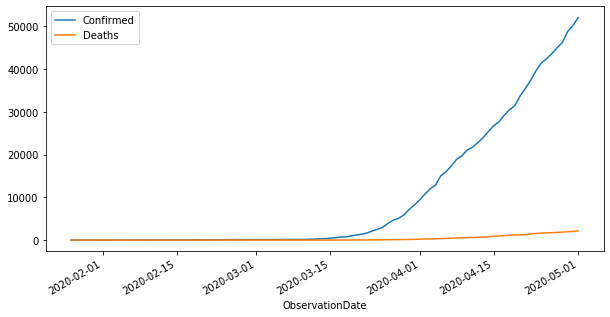

In [34]:
California_df = df2[df2["US_State"] == "California"]

California_df = California_df[California_df["Confirmed"] > 0]
California_df = California_df[["Confirmed", "Deaths"]]
California_df.plot(figsize=(10,5))

**Modelling the data of confirmed cases for California from 3/1/20 to 4/16/20**

                 Confirmed  Deaths  Recovered    US_State
ObservationDate                                          
2020-03-10             144       2          2  California
2020-03-11             177       3          2  California
2020-03-12             221       4          6  California
2020-03-13             282       4          6  California
2020-03-14             340       5          6  California
2020-03-15             426       6          6  California
2020-03-16             557       7          6  California
2020-03-17             698      12          6  California
2020-03-18             751      13          0  California
2020-03-19             952      18          0  California
2020-03-20            1177      23          0  California
2020-03-21            1364      24          0  California
2020-03-22            1646      30          0  California
2020-03-23            2108      39          0  California
2020-03-24            2538      50          0  California
2020-03-25    

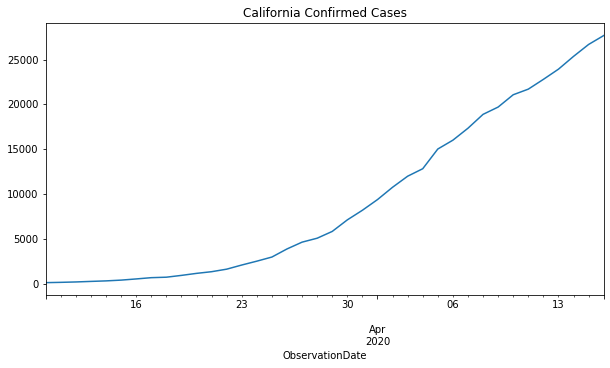

In [35]:
California_confirmed = df2[df2["US_State"] == "California"]
California_confirmed = California_confirmed.loc["2020-03-01":"2020-04-16"]

California_confirmed["Confirmed"].plot(figsize=(10,5), title="California Confirmed Cases")
print(California_confirmed)

**Number of confirmed cases, predicted in two weeks using Holt exponential smoothing.**

2020-04-17    29076.625554
2020-04-18    30408.772239
2020-04-19    31801.951274
2020-04-20    33258.958859
2020-04-21    34782.719300
2020-04-22    36376.290883
2020-04-23    38042.872007
2020-04-24    39785.807608
2020-04-25    41608.595868
2020-04-26    43514.895241
2020-04-27    45508.531790
2020-04-28    47593.506872
2020-04-29    49774.005166
2020-04-30    52054.403070
Freq: D, dtype: float64


C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


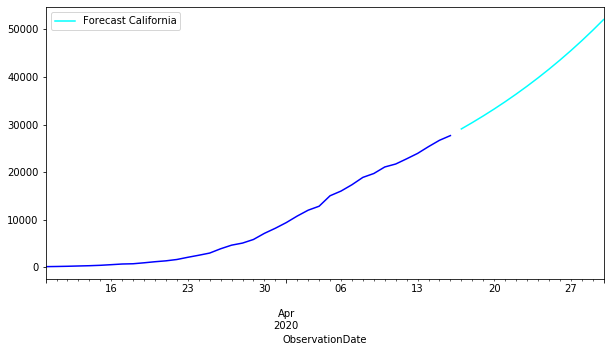

In [36]:
ets_California = Holt(California_confirmed["Confirmed"], exponential=True).fit()
forecast_California = ets_California.forecast(14) #days to forecast
print(forecast_California)

California_confirmed["Confirmed"].plot(figsize=(10,5), color="blue")
forecast_California.plot(kind="line", color="cyan", legend=True, label="Forecast California")

**Actual confirmed cases with two weeks included for comparison.**

                 Confirmed  Deaths  Recovered    US_State
ObservationDate                                          
2020-03-10             144       2          2  California
2020-03-11             177       3          2  California
2020-03-12             221       4          6  California
2020-03-13             282       4          6  California
2020-03-14             340       5          6  California
2020-03-15             426       6          6  California
2020-03-16             557       7          6  California
2020-03-17             698      12          6  California
2020-03-18             751      13          0  California
2020-03-19             952      18          0  California
2020-03-20            1177      23          0  California
2020-03-21            1364      24          0  California
2020-03-22            1646      30          0  California
2020-03-23            2108      39          0  California
2020-03-24            2538      50          0  California
2020-03-25    

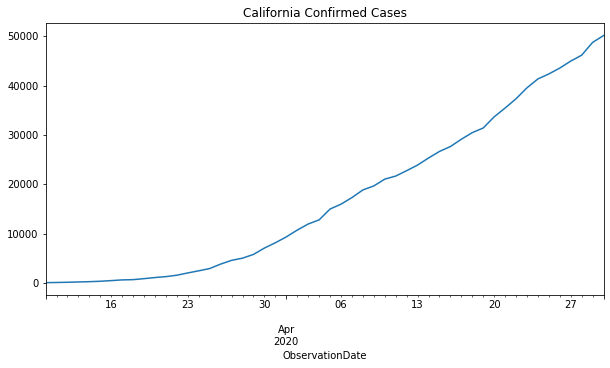

In [37]:
California_confirmed = df2[df2["US_State"] == "California"]
California_confirmed = California_confirmed.loc["2020-03-01":"2020-04-30"]

California_confirmed["Confirmed"].plot(figsize=(10,5), title="California Confirmed Cases")
print(California_confirmed)

**Data visualization for California. (Showing 'Confirmed'and 'Deaths' up to 5/1/20)**

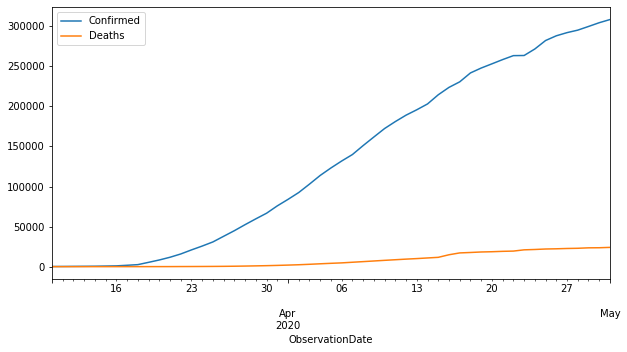

In [38]:
New_York_df = df2[df2["US_State"] == "New York"]

New_York_df = New_York_df[New_York_df["Confirmed"] > 0]
New_York_df = New_York_df[["Confirmed", "Deaths"]]
New_York_df.plot(figsize=(10,5))

**Modelling the data of confirmed cases for New York from 3/1/20 to 4/20/20**

                 Confirmed  Deaths  Recovered  US_State
ObservationDate                                        
2020-03-10             173       0          0  New York
2020-03-11             220       0          0  New York
2020-03-12             328       0          0  New York
2020-03-13             421       0          0  New York
2020-03-14             525       2          0  New York
2020-03-15             732       3          0  New York
2020-03-16             967      10          0  New York
2020-03-17            1706      13          0  New York
2020-03-18            2495      16          0  New York
2020-03-19            5365      34          0  New York
2020-03-20            8310      42          0  New York
2020-03-21           11710      60          0  New York
2020-03-22           15800     117          0  New York
2020-03-23           20884     158          0  New York
2020-03-24           25681     210          0  New York
2020-03-25           30841     285          0  N

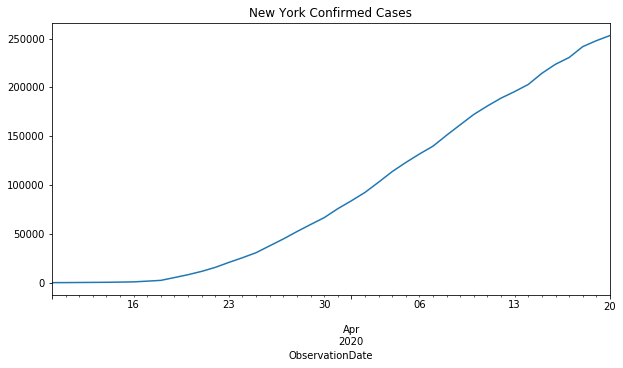

In [39]:
New_York_confirmed = df2[df2["US_State"] == "New York"]
New_York_confirmed = New_York_confirmed.loc["2020-03-01":"2020-04-20"]

New_York_confirmed["Confirmed"].plot(figsize=(10,5), title="New York Confirmed Cases")
print(New_York_confirmed)

**Number of confirmed cases, predicted in 10 days using Holt exponential smoothing.**

2020-04-21    258466.289593
2020-04-22    263879.901692
2020-04-23    269406.902642
2020-04-24    275049.667391
2020-04-25    280810.620625
2020-04-26    286692.237820
2020-04-27    292697.046298
2020-04-28    298827.626319
2020-04-29    305086.612184
2020-04-30    311476.693372
Freq: D, dtype: float64


C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


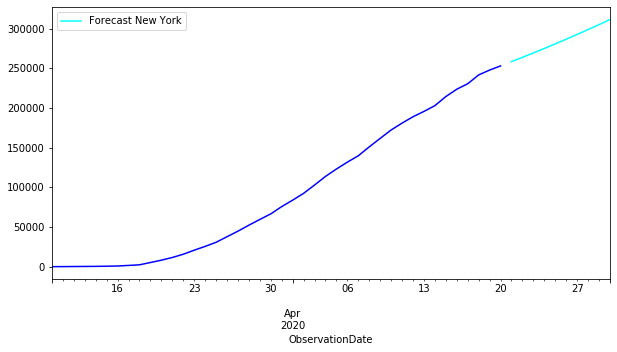

In [40]:
ets_New_York = Holt(New_York_confirmed["Confirmed"], exponential=True).fit()
forecast_New_York = ets_New_York.forecast(10) #days to forecast
print(forecast_New_York)

New_York_confirmed["Confirmed"].plot(figsize=(10,5), color="blue")
forecast_New_York.plot(kind="line", color="cyan", legend=True, label="Forecast New York")

**Actual confirmed cases with 10 days included for comparison.**

                 Confirmed  Deaths  Recovered  US_State
ObservationDate                                        
2020-03-10             173       0          0  New York
2020-03-11             220       0          0  New York
2020-03-12             328       0          0  New York
2020-03-13             421       0          0  New York
2020-03-14             525       2          0  New York
2020-03-15             732       3          0  New York
2020-03-16             967      10          0  New York
2020-03-17            1706      13          0  New York
2020-03-18            2495      16          0  New York
2020-03-19            5365      34          0  New York
2020-03-20            8310      42          0  New York
2020-03-21           11710      60          0  New York
2020-03-22           15800     117          0  New York
2020-03-23           20884     158          0  New York
2020-03-24           25681     210          0  New York
2020-03-25           30841     285          0  N

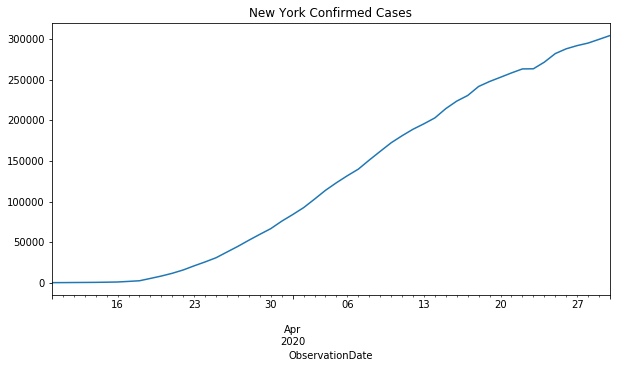

In [41]:
New_York_confirmed = df2[df2["US_State"] == "New York"]
New_York_confirmed = New_York_confirmed.loc["2020-03-01":"2020-04-30"]

New_York_confirmed["Confirmed"].plot(figsize=(10,5), title="New York Confirmed Cases")
print(New_York_confirmed)

In [42]:
print(US_confirmed)

                Country/Region  Confirmed  Deaths  Recovered CountryOrRegion
ObservationDate                                                             
2020-03-01                  US         76       1          7              US
2020-03-02                  US        101       6          7              US
2020-03-03                  US        122       7          8              US
2020-03-04                  US        153      11          8              US
2020-03-05                  US        221      12          8              US
...                        ...        ...     ...        ...             ...
2020-04-26                  US     965783   54881     106988              US
2020-04-27                  US     988197   56259     111424              US
2020-04-28                  US    1012582   58355     115936              US
2020-04-29                  US    1039909   60967     120720              US
2020-04-30                  US    1069424   62996     153947              US

**Predicting confirmed cases in the United States, California, and New York on May 15. (two weeks from today)**

2020-05-02    1.138580e+06
2020-05-03    1.174818e+06
2020-05-04    1.212209e+06
2020-05-05    1.250789e+06
2020-05-06    1.290598e+06
2020-05-07    1.331674e+06
2020-05-08    1.374057e+06
2020-05-09    1.417789e+06
2020-05-10    1.462912e+06
2020-05-11    1.509472e+06
2020-05-12    1.557514e+06
2020-05-13    1.607085e+06
2020-05-14    1.658233e+06
2020-05-15    1.711010e+06
Freq: D, dtype: float64


C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


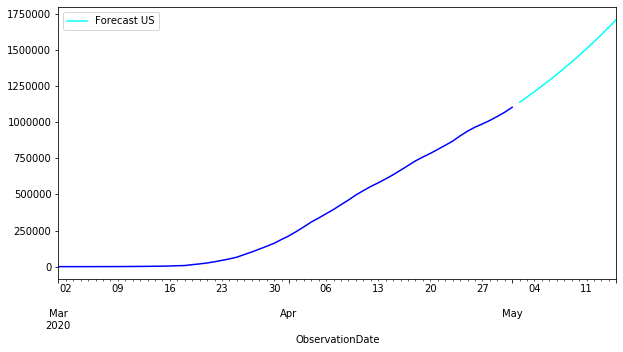

In [43]:
US_confirmed = df[df["CountryOrRegion"] == "US"]
US_confirmed = US_confirmed.loc["2020-03-01":"2020-05-01"]

ets_US = Holt(US_confirmed["Confirmed"], exponential=True).fit()
forecast_US = ets_US.forecast(14) #days to forecast
print(forecast_US)

US_confirmed["Confirmed"].plot(figsize=(10,5), color="blue")
forecast_US.plot(kind="line", color="cyan", legend=True, label="Forecast US")

In [44]:
forecast_US.to_csv('forecastUS.csv')

In [45]:
#Percent growth in confirmed cases in United States
((1.711010e+06 - 1069424   )/ 1069424   )*100

59.99360403357321

In [46]:
print(California_confirmed)

                 Confirmed  Deaths  Recovered    US_State
ObservationDate                                          
2020-03-10             144       2          2  California
2020-03-11             177       3          2  California
2020-03-12             221       4          6  California
2020-03-13             282       4          6  California
2020-03-14             340       5          6  California
2020-03-15             426       6          6  California
2020-03-16             557       7          6  California
2020-03-17             698      12          6  California
2020-03-18             751      13          0  California
2020-03-19             952      18          0  California
2020-03-20            1177      23          0  California
2020-03-21            1364      24          0  California
2020-03-22            1646      30          0  California
2020-03-23            2108      39          0  California
2020-03-24            2538      50          0  California
2020-03-25    

2020-05-02    53978.991994
2020-05-03    55977.902261
2020-05-04    58050.834700
2020-05-05    60200.530446
2020-05-06    62429.832141
2020-05-07    64741.687694
2020-05-08    67139.154180
2020-05-09    69625.401878
2020-05-10    72203.718469
2020-05-11    74877.513380
2020-05-12    77650.322296
2020-05-13    80525.811828
2020-05-14    83507.784370
2020-05-15    86600.183123
Freq: D, dtype: float64


C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


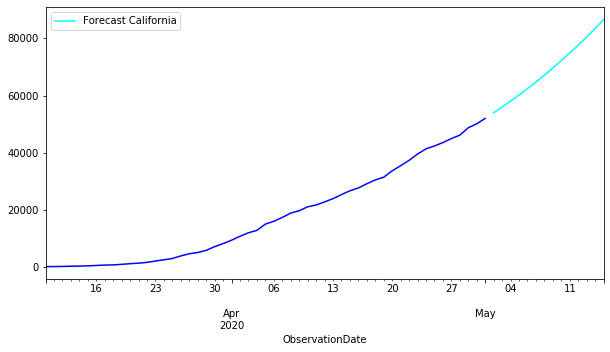

In [47]:
California_confirmed = df2[df2["US_State"] == "California"]
California_confirmed = California_confirmed.loc["2020-03-01":"2020-05-01"]

ets_California = Holt(California_confirmed["Confirmed"], exponential=True).fit()
forecast_California = ets_California.forecast(14) #days to forecast
print(forecast_California)

California_confirmed["Confirmed"].plot(figsize=(10,5), color="blue")
forecast_California.plot(kind="line", color="cyan", legend=True, label="Forecast California")

In [48]:
forecast_California.to_csv('forecastCA.csv')

In [49]:
#Percent change in California
((86600 - 50130    )/ 50130    )*100

72.7508477957311

In [50]:
print(New_York_confirmed)

                 Confirmed  Deaths  Recovered  US_State
ObservationDate                                        
2020-03-10             173       0          0  New York
2020-03-11             220       0          0  New York
2020-03-12             328       0          0  New York
2020-03-13             421       0          0  New York
2020-03-14             525       2          0  New York
2020-03-15             732       3          0  New York
2020-03-16             967      10          0  New York
2020-03-17            1706      13          0  New York
2020-03-18            2495      16          0  New York
2020-03-19            5365      34          0  New York
2020-03-20            8310      42          0  New York
2020-03-21           11710      60          0  New York
2020-03-22           15800     117          0  New York
2020-03-23           20884     158          0  New York
2020-03-24           25681     210          0  New York
2020-03-25           30841     285          0  N

2020-05-02    312470.805407
2020-05-03    316683.654429
2020-05-04    320953.302667
2020-05-05    325280.515910
2020-05-06    329666.070271
2020-05-07    334110.752327
2020-05-08    338615.359259
2020-05-09    343180.698998
2020-05-10    347807.590365
2020-05-11    352496.863224
2020-05-12    357249.358625
2020-05-13    362065.928957
2020-05-14    366947.438104
2020-05-15    371894.761595
Freq: D, dtype: float64


C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


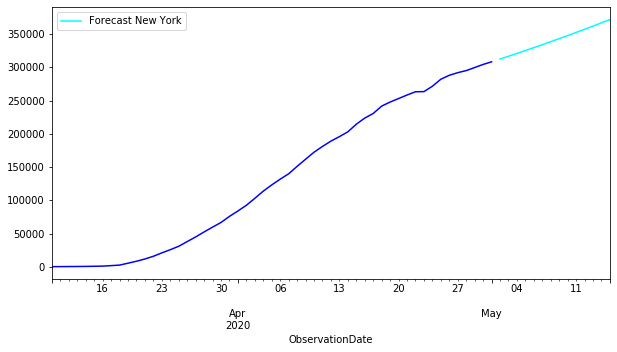

In [51]:
New_York_confirmed = df2[df2["US_State"] == "New York"]
New_York_confirmed = New_York_confirmed.loc["2020-03-01":"2020-05-01"]

ets_New_York = Holt(New_York_confirmed["Confirmed"], exponential=True).fit()
forecast_New_York = ets_New_York.forecast(14) #days to forecast
print(forecast_New_York)

New_York_confirmed["Confirmed"].plot(figsize=(10,5), color="blue")
forecast_New_York.plot(kind="line", color="cyan", legend=True, label="Forecast New York")

In [52]:
forecast_New_York.to_csv('forecastNY.csv')

In [53]:
#Percent growth in confirmed cases in New York 
((371894 - 304372   )/ 304372   )*100

22.18403795355683

                Country/Region  Confirmed  Deaths  Recovered CountryOrRegion
ObservationDate                                                             
2020-03-01               Italy       1694      34         83           Italy
2020-03-02               Italy       2036      52        149           Italy
2020-03-03               Italy       2502      79        160           Italy
2020-03-04               Italy       3089     107        276           Italy
2020-03-05               Italy       3858     148        414           Italy
...                        ...        ...     ...        ...             ...
2020-04-27               Italy     199414   26977      66624           Italy
2020-04-28               Italy     201505   27359      68941           Italy
2020-04-29               Italy     203591   27682      71252           Italy
2020-04-30               Italy     205463   27967      75945           Italy
2020-05-01               Italy     207428   28236      78249           Italy

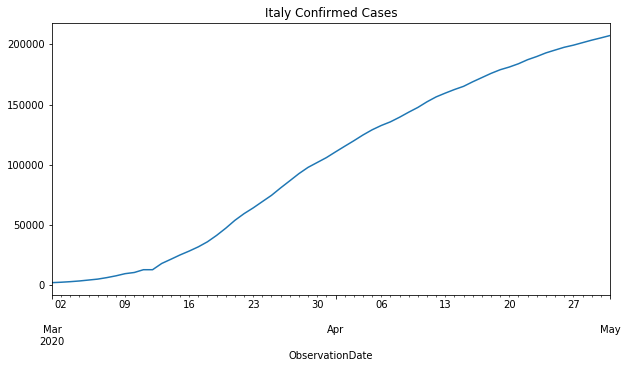

In [54]:
Italy_confirmed = df[df["CountryOrRegion"] == "Italy"]
Italy_confirmed = Italy_confirmed.loc["2020-03-01":"2020-05-01"]

Italy_confirmed["Confirmed"].plot(figsize=(10,5), title="Italy Confirmed Cases")
print(Italy_confirmed)

2020-05-02    209388.706058
2020-05-03    211367.566335
2020-05-04    213365.128135
2020-05-05    215381.568202
2020-05-06    217417.064947
2020-05-07    219471.798467
2020-05-08    221545.950564
2020-05-09    223639.704756
2020-05-10    225753.246294
2020-05-11    227886.762183
2020-05-12    230040.441193
2020-05-13    232214.473879
2020-05-14    234409.052596
2020-05-15    236624.371518
Freq: D, dtype: float64


C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


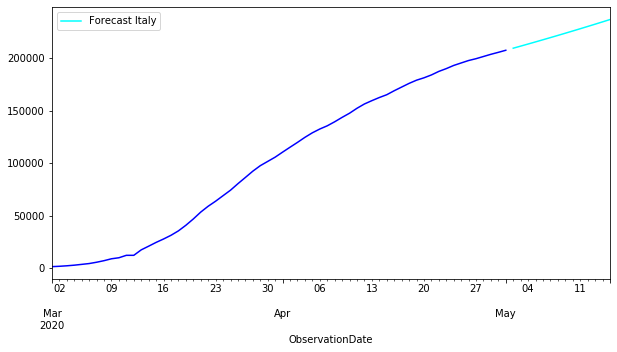

In [55]:
ets_Italy = Holt(Italy_confirmed["Confirmed"], exponential=True).fit()
forecast_Italy = ets_Italy.forecast(14) #days to forecast
print(forecast_Italy)

Italy_confirmed["Confirmed"].plot(figsize=(10,5), color="blue")
forecast_Italy.plot(kind="line", color="cyan", legend=True, label="Forecast Italy")

In [56]:
#Percent growth in confirmed cases in Italy
((236624 - 207428   )/ 207428   )*100

14.075245386350927

                Country/Region  Confirmed  Deaths  Recovered CountryOrRegion
ObservationDate                                                             
2020-03-01         South Korea       3736      17         30     South Korea
2020-03-02         South Korea       4335      28         30     South Korea
2020-03-03         South Korea       5186      28         30     South Korea
2020-03-04         South Korea       5621      35         41     South Korea
2020-03-05         South Korea       6088      35         41     South Korea
...                        ...        ...     ...        ...             ...
2020-04-27         South Korea      10752     244       8854     South Korea
2020-04-28         South Korea      10761     246       8922     South Korea
2020-04-29         South Korea      10765     247       9059     South Korea
2020-04-30         South Korea      10774     248       9072     South Korea
2020-05-01         South Korea      10780     250       9123     South Korea

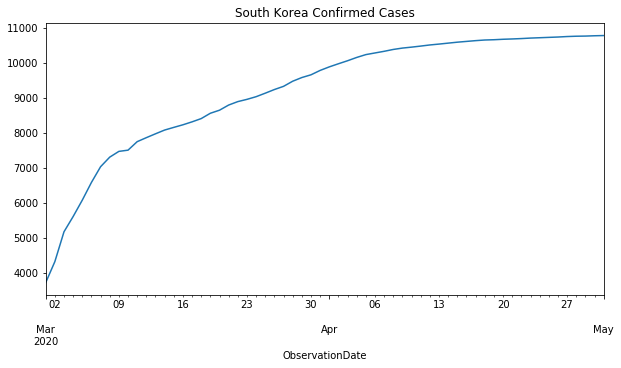

In [57]:
SK_confirmed = df[df["CountryOrRegion"] == "South Korea"]
SK_confirmed = SK_confirmed.loc["2020-03-01":"2020-05-01"]

SK_confirmed["Confirmed"].plot(figsize=(10,5), title="South Korea Confirmed Cases")
print(SK_confirmed)

2020-05-02    10786.672097
2020-05-03    10793.221898
2020-05-04    10799.775676
2020-05-05    10806.333433
2020-05-06    10812.895173
2020-05-07    10819.460897
2020-05-08    10826.030607
2020-05-09    10832.604307
2020-05-10    10839.181999
2020-05-11    10845.763684
2020-05-12    10852.349366
2020-05-13    10858.939047
2020-05-14    10865.532729
2020-05-15    10872.130416
Freq: D, dtype: float64


C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


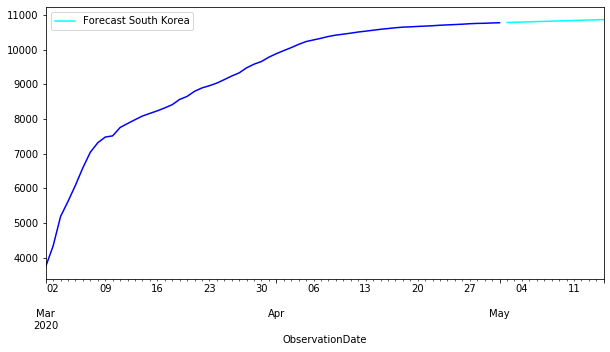

In [58]:
ets_SK = Holt(SK_confirmed["Confirmed"], exponential=True).fit()
forecast_SK = ets_SK.forecast(14) #days to forecast
print(forecast_SK)

SK_confirmed["Confirmed"].plot(figsize=(10,5), color="blue")
forecast_SK.plot(kind="line", color="cyan", legend=True, label="Forecast South Korea")

In [59]:
#Percent growth in confirmed cases in South Korea
((10872 - 10780     )/ 10780     )*100

0.8534322820037107

2020-05-02    6790.355291
2020-05-03    6802.642310
2020-05-04    6814.951562
2020-05-05    6827.283087
2020-05-06    6839.636926
2020-05-07    6852.013119
2020-05-08    6864.411706
2020-05-09    6876.832729
2020-05-10    6889.276227
2020-05-11    6901.742241
2020-05-12    6914.230812
2020-05-13    6926.741981
2020-05-14    6939.275789
2020-05-15    6951.832277
Freq: D, dtype: float64


C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Mitchell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


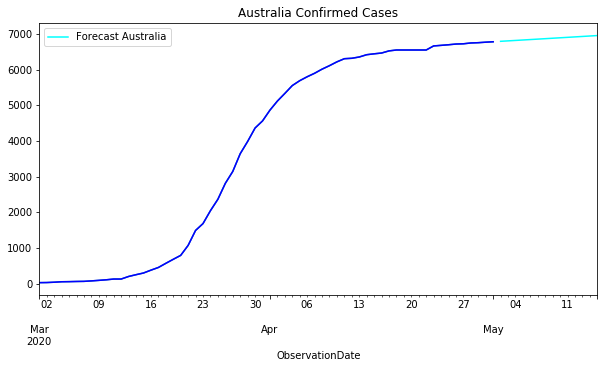

In [60]:
Aus_confirmed2 = df[df["CountryOrRegion"] == "Australia"]
Aus_confirmed2 = Aus_confirmed2.loc["2020-03-01":"2020-05-01"]

Aus_confirmed2["Confirmed"].plot(figsize=(10,5), title="Australia Confirmed Cases")
ets_Aus2 = Holt(Aus_confirmed2["Confirmed"], exponential=True).fit()
forecast_Aus2 = ets_Aus2.forecast(14) #days to forecast
print(forecast_Aus2)

Aus_confirmed2["Confirmed"].plot(figsize=(10,5), color="blue")
forecast_Aus2.plot(kind="line", color="cyan", legend=True, label="Forecast Australia")

In [61]:
#Percent growth in confirmed cases in Australia 
((6951 - 6778      )/ 6778      )*100

2.552375331956329